<h1 style="text-align: center; color: #E30613;"><b><i>Entraînement des Modèles sur les Données de Sentiments</i></b></h1>

Ce notebook explore un pipeline complet pour l'analyse des sentiments à partir de données textuelles. Voici les étapes principales couvertes :

<ol>
    <li><b>Chargement des Données</b> : Importation des données à partir d'un fichier CSV et exploration initiale.</li>
    <li><b>Prétraitement des Données</b> : Nettoyage des données, suppression des valeurs manquantes et encodage des étiquettes.</li>
    <li><b>Division des Données</b> : Séparation des données en ensembles d'entraînement, de validation et de test.</li>
    <li><b>Vectorisation</b> : Transformation des données textuelles en représentations numériques à l'aide de <code>CountVectorizer</code> et <code>TfidfVectorizer</code>.</li>
    <li><b>Entraînement des Modèles</b> : Application de plusieurs algorithmes de classification, notamment :
        <ul>
            <li>Régression Logistique</li>
            <li>SVM (Support Vector Machine)</li>
            <li>Arbre de Décision</li>
            <li>Naive Bayes</li>
            <li>LightGBM</li>
        </ul>
    </li>
    <li><b>Évaluation des Modèles</b> : Analyse des performances des modèles à l'aide de métriques telles que l'accuracy, les matrices de confusion et les rapports de classification.</li>
    <li><b>Visualisation</b> : Utilisation de graphiques pour interpréter les résultats et comparer les performances des modèles.</li>
</ol>

Chaque étape est documentée et accompagnée de visualisations pour une meilleure compréhension des résultats.

## <span style="color: #28A745;">**Bibiliothèques nécessaires**</span>

In [276]:
%pip install pandas numpy scikit-learn matplotlib seaborn lightgbm

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

## <span style="color: #28A745;">**Chargement des Données**</span>

In [277]:
# Lire le fichier CSV contenant les commentaires nettoyés
file_path = "/content/Results/Comments_clean.csv"
df = pd.read_csv(file_path)

# Afficher les 5 premières lignes du DataFrame
df.head()

,ID Post,User Name,Comments,Sentiments
0,1,Yanise Yanise,سلام عليكم ورحمة لديا مشكلة تعبئة بدات تنقص قل...,Negatif
1,1,Jj Kie,عام انتم بخير,Positif
2,1,Sakou Younes,عام انتم بخير,Positif
3,1,راني نعاني,عام بخير,Positif
4,1,أحمد فيراس,حب,Positif


## <span style="color: #28A745;">**Encodage des étiquettes de sentiments**</span>

In [278]:
from sklearn.preprocessing import LabelEncoder

# Verifier les colonnes du DataFrame
df = df.dropna(subset=["Comments"])

label_encoder = LabelEncoder()
df["Sentiments_encoded"] = label_encoder.fit_transform(df["Sentiments"])

# Séparer les données en variables d'entrée (X) et cible (y)
X = df["Comments"]
y = df["Sentiments_encoded"]

## <span style="color: #28A745;">**Division en jeu d'entraînement, validation et de test**</span>

In [279]:
from sklearn.model_selection import train_test_split

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # (80% pour train+validation, 20% pour test)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.125, random_state=42)  # 0.125 * 0.8 = 0.1 (70% pour train, 10% pour validation)

## <span style="color: #28A745;">**Vectorisation (CountVectorizer & TFIDFVectorizer)**</span>

In [280]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

count_vectorizer = CountVectorizer()
tfidf_vectorizer = TfidfVectorizer()

X_train_count = count_vectorizer.fit_transform(X_train)
X_val_count = count_vectorizer.transform(X_val)
X_test_count = count_vectorizer.transform(X_test)

X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_val_tfidf = tfidf_vectorizer.transform(X_val)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Afficher les dimensions des matrices vectorisées
{
    "CountVectorizer train shape": X_train_count.shape,
    "CountVectorizer val shape": X_val_count.shape,
    "CountVectorizer test shape": X_test_count.shape,
    "TF-IDF train shape": X_train_tfidf.shape,
    "TF-IDF val shape": X_val_tfidf.shape,
    "TF-IDF test shape": X_test_tfidf.shape,
    "Classes": label_encoder.classes_
}

{'CountVectorizer train shape': (2529, 4615),
 'CountVectorizer val shape': (362, 4615),
 'CountVectorizer test shape': (723, 4615),
 'TF-IDF train shape': (2529, 4615),
 'TF-IDF val shape': (362, 4615),
 'TF-IDF test shape': (723, 4615),
 'Classes': array(['Negatif', 'Neutre', 'Positif'], dtype=object)}

## <span style="color: #E30613;">**1. Régression Logistique**</span>

In [281]:
from sklearn.linear_model import LogisticRegression

### <span style="color: #28A745;">**1.1. Régression Logistique avec CountVectorizer**</span>

In [282]:
# Entraînement et évaluation avec CountVectorizer
logistic_model_count = LogisticRegression(C=3, max_iter=1000, solver='liblinear', multi_class='auto', class_weight='balanced', penalty='l2')
logistic_model_count.fit(X_train_count, y_train)

# Prédictions sur le jeu de test
y_pred_count = logistic_model_count.predict(X_test_count)

# Prédictions sur le jeu de validation
y_val_pred_count = logistic_model_count.predict(X_val_count)

# Rapport complet pour CountVectorizer
print("Rapport pour LogisticRegression avec CountVectorizer:")
accuracy_count = accuracy_score(y_test, y_pred_count)
print(f"Accuracy pour LogisticRegression avec CountVectorizer: {accuracy_count*100:.2f}%")
accuracy_val_count = accuracy_score(y_val, y_val_pred_count)
print(f"Accuracy pour LogisticRegression avec CountVectorizer (validation): {accuracy_val_count*100:.2f}%")
print(classification_report(y_test, y_pred_count, target_names=label_encoder.classes_))


Rapport pour LogisticRegression avec CountVectorizer:
Accuracy pour LogisticRegression avec CountVectorizer: 87.28%
Accuracy pour LogisticRegression avec CountVectorizer (validation): 89.78%
              precision    recall  f1-score   support

     Negatif       0.90      0.81      0.85       178
      Neutre       0.78      0.89      0.83       233
     Positif       0.94      0.90      0.92       312

    accuracy                           0.87       723
   macro avg       0.87      0.86      0.87       723
weighted avg       0.88      0.87      0.87       723



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


#### <span style="color: #28A745;">**Matrice de confusion**</span>

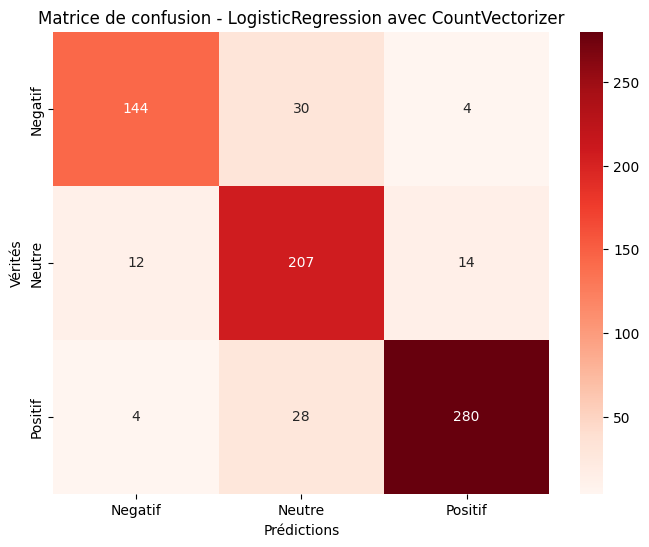

In [283]:
# Matrice de confusion pour CountVectorizer
conf_matrix_count = confusion_matrix(y_test, y_pred_count)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_count, annot=True, fmt='d', cmap='Reds', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Matrice de confusion - LogisticRegression avec CountVectorizer")
plt.xlabel("Prédictions")
plt.ylabel("Vérités")
plt.show()

#### <span style="color: #28A745;">**Courbe d’apprentissage**</span>

In [ ]:
from sklearn.model_selection import learning_curve

# Fonction pour tracer la courbe d'apprentissage
def plot_learning_curve(estimator, X, y, title):
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=5, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))
    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)

    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Score d'entraînement")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Score de validation")
    plt.title(title)
    plt.xlabel("Taille de l'échantillon d'entraînement")
    plt.ylabel("Score")
    plt.legend(loc="best")
    plt.grid()
    plt.show()

# Tracer la courbe d'apprentissage pour Logistic Regression avec CountVectorizer
plot_learning_curve(logistic_model_count, X_train_count, y_train, "Courbe d'apprentissage - Logistic Regression (CountVectorizer)")

### <span style="color: #28A745;">**1.2. Régression Logistique avec TF-IDF Vectorizer**</span>

In [284]:
# Entraînement et évaluation avec TF-IDF
logistic_model_tfidf = LogisticRegression(C=10, max_iter=1000, solver='liblinear', multi_class='auto', class_weight='balanced', penalty='l2')
logistic_model_tfidf.fit(X_train_tfidf, y_train)

# Prédictions sur le jeu de test
y_pred_tfidf = logistic_model_tfidf.predict(X_test_tfidf)

# Prédictions sur le jeu de validation
y_val_pred_tfidf = logistic_model_tfidf.predict(X_val_tfidf)

# Rapport complet pour TF-IDF
print("Rapport pour LogisticRegression avec TF-IDF:")
accuracy_tfidf = accuracy_score(y_test, y_pred_tfidf)
print(f"Accuracy pour LogisticRegression avec TF-IDF: {accuracy_tfidf*100:.2f}%")
accuracy_val_tfidf = accuracy_score(y_val, y_val_pred_tfidf)
print(f"Accuracy pour LogisticRegression avec TF-IDF (validation): {accuracy_val_tfidf*100:.2f}%")
print(classification_report(y_test, y_pred_tfidf, target_names=label_encoder.classes_))

Rapport pour LogisticRegression avec TF-IDF:
Accuracy pour LogisticRegression avec TF-IDF: 86.58%
Accuracy pour LogisticRegression avec TF-IDF (validation): 89.78%
              precision    recall  f1-score   support

     Negatif       0.85      0.85      0.85       178
      Neutre       0.79      0.82      0.81       233
     Positif       0.93      0.91      0.92       312

    accuracy                           0.87       723
   macro avg       0.86      0.86      0.86       723
weighted avg       0.87      0.87      0.87       723



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


#### <span style="color: #28A745;">**Matrice de confusion**</span>

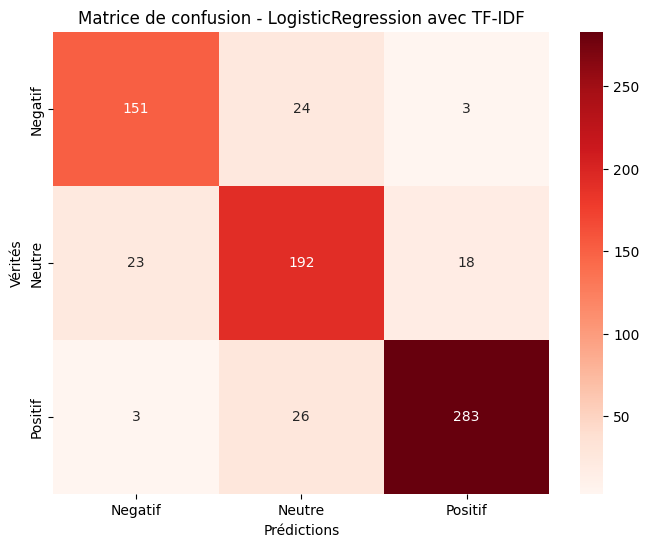

In [285]:
# Matrice de confusion pour TF-IDF
conf_matrix_tfidf = confusion_matrix(y_test, y_pred_tfidf)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_tfidf, annot=True, fmt='d', cmap='Reds', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Matrice de confusion - LogisticRegression avec TF-IDF")
plt.xlabel("Prédictions")
plt.ylabel("Vérités")
plt.show()

#### <span style="color: #28A745;">**Courbe d’apprentissage**</span>

In [ ]:
# Tracer la courbe d'apprentissage pour Logistic Regression avec TF-IDF
plot_learning_curve(logistic_model_tfidf, X_train_tfidf, y_train, "Courbe d'apprentissage - Logistic Regression (TF-IDF)")

## <span style="color: #E30613;">**2. SVM (Support Vector Machine)**</span>

In [286]:
from sklearn.svm import SVC

### <span style="color: #28A745;">**2.1. SVM avec CountVectorizer**</span>

In [287]:
# Entraînement et évaluation avec CountVectorizer
svc_model_count = SVC(C=2, kernel='sigmoid', class_weight='balanced', gamma='scale')
svc_model_count.fit(X_train_count, y_train)

# Prédictions sur le jeu de test
y_pred_count_svc = svc_model_count.predict(X_test_count)

# Prédictions sur le jeu de validation
y_val_pred_count_svc = svc_model_count.predict(X_val_count)

# Rapport complet pour SVC avec CountVectorizer
print("Rapport pour SVC avec CountVectorizer:")
# Accuracy pour CountVectorizer (test)
accuracy_count_svc = accuracy_score(y_test, y_pred_count_svc)
print(f"Accuracy pour SVC avec CountVectorizer: {accuracy_count_svc*100:.2f}%")
accuracy_val_count_svc = accuracy_score(y_val, y_val_pred_count_svc)
print(f"Accuracy pour SVC avec CountVectorizer (validation): {accuracy_val_count_svc*100:.2f}%")
print(classification_report(y_test, y_pred_count_svc, target_names=label_encoder.classes_))

Rapport pour SVC avec CountVectorizer:
Accuracy pour SVC avec CountVectorizer: 85.89%
Accuracy pour SVC avec CountVectorizer (validation): 86.46%
              precision    recall  f1-score   support

     Negatif       0.88      0.81      0.84       178
      Neutre       0.76      0.87      0.81       233
     Positif       0.94      0.88      0.91       312

    accuracy                           0.86       723
   macro avg       0.86      0.85      0.85       723
weighted avg       0.87      0.86      0.86       723



#### <span style="color: #28A745;">**Matrice de confusion**</span>

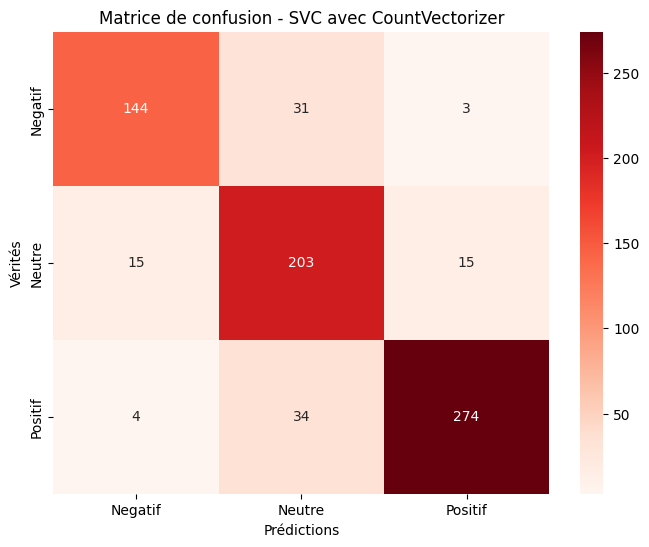

In [288]:
# Matrice de confusion pour SVC avec CountVectorizer
conf_matrix_count_svc = confusion_matrix(y_test, y_pred_count_svc)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_count_svc, annot=True, fmt='d', cmap='Reds', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Matrice de confusion - SVC avec CountVectorizer")
plt.xlabel("Prédictions")
plt.ylabel("Vérités")
plt.show()

#### <span style="color: #28A745;">**Courbe d’apprentissage**</span>

In [ ]:
# Tracer la courbe d'apprentissage pour SVM avec CountVectorizer
plot_learning_curve(svc_model_count, X_train_count, y_train, "Courbe d'apprentissage - SVM (CountVectorizer)")

### <span style="color: #28A745;">**2.2. SVM avec TF-IDF Vectorizer**</span>

In [289]:
# Entraînement et évaluation avec TF-IDF
svc_model_tfidf = SVC(C=1, kernel='sigmoid', class_weight='balanced', gamma='scale')
svc_model_tfidf.fit(X_train_tfidf, y_train)

# Prédictions sur le jeu de test
y_pred_tfidf_svc = svc_model_tfidf.predict(X_test_tfidf)

# Prédictions sur le jeu de validation
y_val_pred_tfidf_svc = svc_model_tfidf.predict(X_val_tfidf)

# Rapport complet pour SVC avec TF-IDF
print("Rapport pour SVC avec TF-IDF:")
# Accuracy pour TF-IDF (test)
accuracy_tfidf_svc = accuracy_score(y_test, y_pred_tfidf_svc)
print(f"Accuracy pour SVC avec TF-IDF: {accuracy_tfidf_svc*100:.2f}%")
accuracy_val_tfidf_svc = accuracy_score(y_val, y_val_pred_tfidf_svc)
print(f"Accuracy pour SVC avec TF-IDF (validation): {accuracy_val_tfidf_svc*100:.2f}%")
print(classification_report(y_test, y_pred_tfidf_svc, target_names=label_encoder.classes_))

Rapport pour SVC avec TF-IDF:
Accuracy pour SVC avec TF-IDF: 86.86%
Accuracy pour SVC avec TF-IDF (validation): 89.23%
              precision    recall  f1-score   support

     Negatif       0.85      0.85      0.85       178
      Neutre       0.79      0.84      0.81       233
     Positif       0.95      0.90      0.92       312

    accuracy                           0.87       723
   macro avg       0.86      0.86      0.86       723
weighted avg       0.87      0.87      0.87       723



#### <span style="color: #28A745;">**Matrice de confusion**</span>

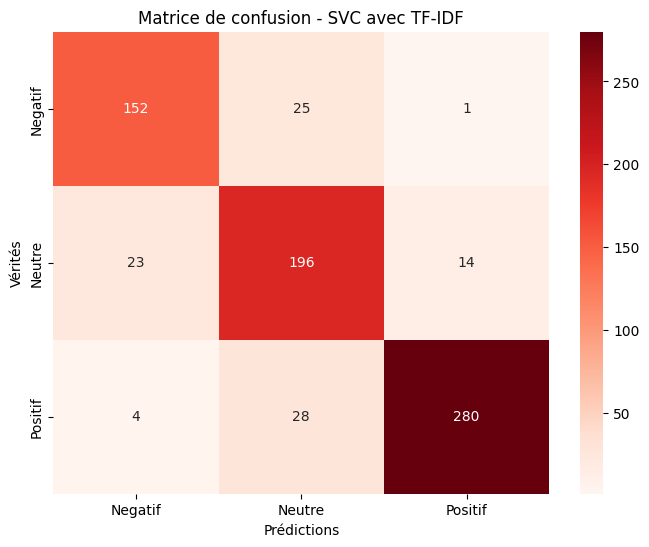

In [290]:
# Matrice de confusion pour SVC avec TF-IDF
conf_matrix_tfidf_svc = confusion_matrix(y_test, y_pred_tfidf_svc)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_tfidf_svc, annot=True, fmt='d', cmap='Reds', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Matrice de confusion - SVC avec TF-IDF")
plt.xlabel("Prédictions")
plt.ylabel("Vérités")
plt.show()

#### <span style="color: #28A745;">**Courbe d’apprentissage**</span>

In [ ]:
# Tracer la courbe d'apprentissage pour Logistic Regression avec TF-IDF
plot_learning_curve(logistic_model_tfidf, X_train_tfidf, y_train, "Courbe d'apprentissage - Logistic Regression (TF-IDF)")

## <span style="color: #E30613;">**3. Arbre de Décision**</span>

In [291]:
from sklearn.tree import DecisionTreeClassifier

### <span style="color: #28A745;">**3.1. Arbre de Décision avec CountVectorizer**</span>

In [292]:
# Entraînement et évaluation avec CountVectorizer
decision_tree_model_count = DecisionTreeClassifier(class_weight='balanced', criterion="gini", max_depth=None, min_samples_leaf=1, min_samples_split=5)
decision_tree_model_count.fit(X_train_count, y_train)

# Prédictions sur le jeu de test
y_pred_count_dt = decision_tree_model_count.predict(X_test_count)

# Prédictions sur le jeu de validation
y_val_pred_count_dt = decision_tree_model_count.predict(X_val_count)

# Rapport complet pour DecisionTreeClassifier avec CountVectorizer
print("Rapport pour DecisionTreeClassifier avec CountVectorizer:")
accuracy_count_dt = accuracy_score(y_test, y_pred_count_dt)
print(f"Accuracy pour DecisionTreeClassifier avec CountVectorizer: {accuracy_count_dt*100:.2f}%")
accuracy_val_count_dt = accuracy_score(y_val, y_val_pred_count_dt)
print(f"Accuracy pour DecisionTreeClassifier avec CountVectorizer (validation): {accuracy_val_count_dt*100:.2f}%")
print(classification_report(y_test, y_pred_count_dt, target_names=label_encoder.classes_))

Rapport pour DecisionTreeClassifier avec CountVectorizer:
Accuracy pour DecisionTreeClassifier avec CountVectorizer: 80.50%
Accuracy pour DecisionTreeClassifier avec CountVectorizer (validation): 83.43%
              precision    recall  f1-score   support

     Negatif       0.80      0.77      0.79       178
      Neutre       0.68      0.81      0.74       233
     Positif       0.93      0.82      0.87       312

    accuracy                           0.80       723
   macro avg       0.81      0.80      0.80       723
weighted avg       0.82      0.80      0.81       723



#### <span style="color: #28A745;">**Matrice de confusion**</span>

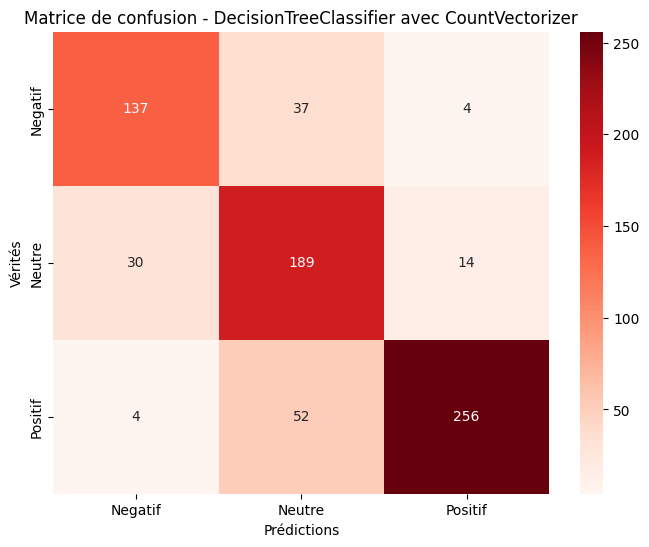

In [293]:
# Matrice de confusion pour DecisionTreeClassifier avec CountVectorizer
conf_matrix_count_dt = confusion_matrix(y_test, y_pred_count_dt)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_count_dt, annot=True, fmt='d', cmap='Reds', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Matrice de confusion - DecisionTreeClassifier avec CountVectorizer")
plt.xlabel("Prédictions")
plt.ylabel("Vérités")
plt.show()

#### <span style="color: #28A745;">**Courbe d’apprentissage**</span>

In [ ]:
# Tracer la courbe d'apprentissage pour DecisionTreeClassifier avec CountVectorizer
plot_learning_curve(decision_tree_model_count, X_train_count, y_train, "Courbe d'apprentissage - DecisionTreeClassifier (CountVectorizer)")

### <span style="color: #28A745;">**3.2. Arbre de Décision avec TF-IDF Vectorizer**</span>

In [294]:
# Entraînement et évaluation avec TF-IDF
decision_tree_model_tfidf = DecisionTreeClassifier(class_weight='balanced', criterion="gini", max_depth=None, min_samples_leaf=1, min_samples_split=5)
decision_tree_model_tfidf.fit(X_train_tfidf, y_train)

# Prédictions sur le jeu de test
y_pred_tfidf_dt = decision_tree_model_tfidf.predict(X_test_tfidf)

# Prédictions sur le jeu de validation
y_val_pred_tfidf_dt = decision_tree_model_tfidf.predict(X_val_tfidf)

# Rapport complet pour DecisionTreeClassifier avec TF-IDF
print("Rapport pour DecisionTreeClassifier avec TF-IDF:")
accuracy_tfidf_dt = accuracy_score(y_test, y_pred_tfidf_dt)
print(f"Accuracy pour DecisionTreeClassifier avec TF-IDF: {accuracy_tfidf_dt*100:.2f}%")
accuracy_val_tfidf_dt = accuracy_score(y_val, y_val_pred_tfidf_dt)
print(f"Accuracy pour DecisionTreeClassifier avec TF-IDF (validation): {accuracy_val_tfidf_dt*100:.2f}%")
print(classification_report(y_test, y_pred_tfidf_dt, target_names=label_encoder.classes_))

Rapport pour DecisionTreeClassifier avec TF-IDF:
Accuracy pour DecisionTreeClassifier avec TF-IDF: 83.13%
Accuracy pour DecisionTreeClassifier avec TF-IDF (validation): 83.15%
              precision    recall  f1-score   support

     Negatif       0.85      0.76      0.80       178
      Neutre       0.72      0.85      0.78       233
     Positif       0.93      0.86      0.89       312

    accuracy                           0.83       723
   macro avg       0.83      0.82      0.82       723
weighted avg       0.84      0.83      0.83       723



#### <span style="color: #28A745;">**Matrice de confusion**</span>

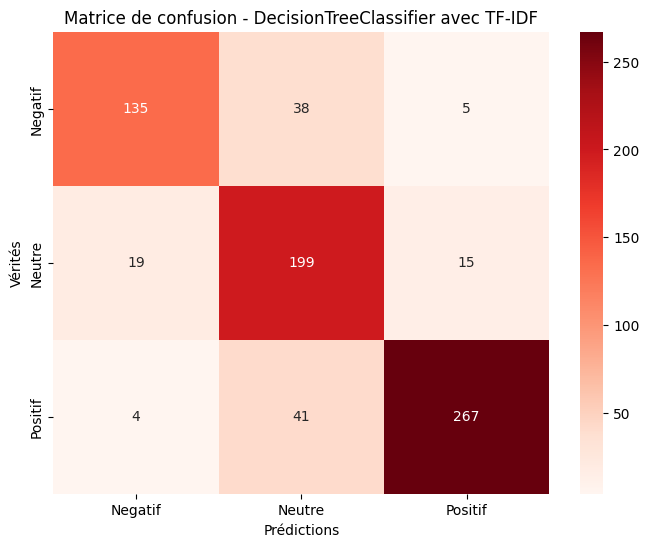

In [295]:
# Matrice de confusion pour DecisionTreeClassifier avec TF-IDF
conf_matrix_tfidf_dt = confusion_matrix(y_test, y_pred_tfidf_dt)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_tfidf_dt, annot=True, fmt='d', cmap='Reds', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Matrice de confusion - DecisionTreeClassifier avec TF-IDF")
plt.xlabel("Prédictions")
plt.ylabel("Vérités")
plt.show()

#### <span style="color: #28A745;">**Courbe d’apprentissage**</span>

In [ ]:
# Tracer la courbe d'apprentissage pour DecisionTreeClassifier avec TF-IDF
plot_learning_curve(decision_tree_model_tfidf, X_train_tfidf, y_train, "Courbe d'apprentissage - DecisionTreeClassifier (TF-IDF)")

## <span style="color: #E30613;">**4. Naive Bayes**</span>

In [296]:
from sklearn.naive_bayes import MultinomialNB

### <span style="color: #28A745;">**4.1. Naive Bayes avec CountVectorizer**</span>

In [297]:
# Entraînement et évaluation avec CountVectorizer
nb_model_count = MultinomialNB(alpha=0.5, fit_prior=True, class_prior=[1.9, 5.5, 5])
nb_model_count.fit(X_train_count, y_train)

# Prédictions sur le jeu de test
y_pred_count_nb = nb_model_count.predict(X_test_count)

# Prédictions sur le jeu de validation
y_val_pred_count_nb = nb_model_count.predict(X_val_count)

# Rapport complet pour MultinomialNB avec CountVectorizer
print("Rapport pour MultinomialNB avec CountVectorizer:")
accuracy_count_nb = accuracy_score(y_test, y_pred_count_nb)
print(f"Accuracy pour MultinomialNB avec CountVectorizer: {accuracy_count_nb*100:.2f}%")
accuracy_val_count_nb = accuracy_score(y_val, y_val_pred_count_nb)
print(f"Accuracy pour MultinomialNB avec CountVectorizer (validation): {accuracy_val_count_nb*100:.2f}%")
print(classification_report(y_test, y_pred_count_nb, target_names=label_encoder.classes_))

Rapport pour MultinomialNB avec CountVectorizer:
Accuracy pour MultinomialNB avec CountVectorizer: 88.24%
Accuracy pour MultinomialNB avec CountVectorizer (validation): 91.16%
              precision    recall  f1-score   support

     Negatif       0.90      0.85      0.87       178
      Neutre       0.81      0.84      0.83       233
     Positif       0.93      0.93      0.93       312

    accuracy                           0.88       723
   macro avg       0.88      0.87      0.88       723
weighted avg       0.88      0.88      0.88       723



#### <span style="color: #28A745;">**Matrice de confusion**</span>

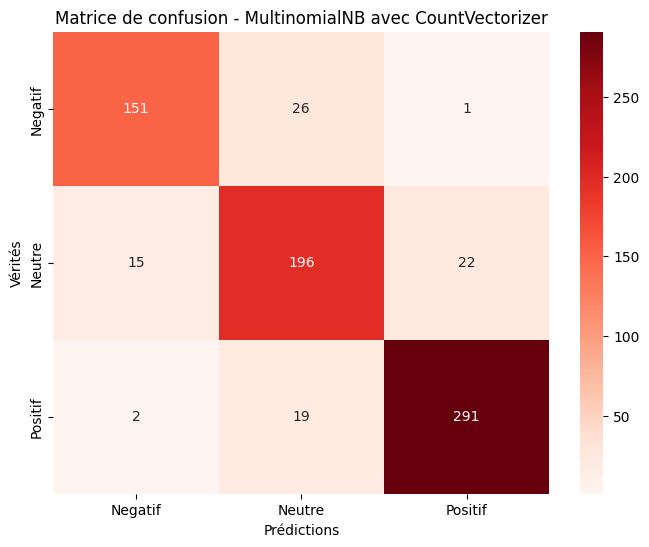

In [298]:
# Matrice de confusion pour MultinomialNB avec CountVectorizer
conf_matrix_count_nb = confusion_matrix(y_test, y_pred_count_nb)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_count_nb, annot=True, fmt='d', cmap='Reds', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Matrice de confusion - MultinomialNB avec CountVectorizer")
plt.xlabel("Prédictions")
plt.ylabel("Vérités")
plt.show()

#### <span style="color: #28A745;">**Courbe d’apprentissage**</span>

In [ ]:
# Tracer la courbe d'apprentissage pour MultinomialNB avec CountVectorizer
plot_learning_curve(nb_model_count, X_train_count, y_train, "Courbe d'apprentissage - MultinomialNB (CountVectorizer)")

### <span style="color: #28A745;">**4.2. Naive Bayes avec TF-IDF Vectorizer**</span>

In [299]:
# Entraînement et évaluation avec TF-IDF
nb_model_tfidf = MultinomialNB(alpha=0.5, fit_prior=True, class_prior=[4.2, 5.6, 5.5])
nb_model_tfidf.fit(X_train_tfidf, y_train)

# Prédictions sur le jeu de test
y_pred_tfidf_nb = nb_model_tfidf.predict(X_test_tfidf)

# Prédictions sur le jeu de validation
y_val_pred_tfidf_nb = nb_model_tfidf.predict(X_val_tfidf)

# Rapport complet pour MultinomialNB avec TF-IDF
print("Rapport pour MultinomialNB avec TF-IDF:")
accuracy_tfidf_nb = accuracy_score(y_test, y_pred_tfidf_nb)
print(f"Accuracy pour MultinomialNB avec TF-IDF: {accuracy_tfidf_nb*100:.2f}%")
accuracy_val_tfidf_nb = accuracy_score(y_val, y_val_pred_tfidf_nb)
print(f"Accuracy pour MultinomialNB avec TF-IDF (validation): {accuracy_val_tfidf_nb*100:.2f}%")
print(classification_report(y_test, y_pred_tfidf_nb, target_names=label_encoder.classes_))

Rapport pour MultinomialNB avec TF-IDF:
Accuracy pour MultinomialNB avec TF-IDF: 87.69%
Accuracy pour MultinomialNB avec TF-IDF (validation): 90.61%
              precision    recall  f1-score   support

     Negatif       0.87      0.86      0.86       178
      Neutre       0.82      0.82      0.82       233
     Positif       0.93      0.93      0.93       312

    accuracy                           0.88       723
   macro avg       0.87      0.87      0.87       723
weighted avg       0.88      0.88      0.88       723



#### <span style="color: #28A745;">**Matrice de confusion**</span>

In [1]:
# Matrice de confusion pour MultinomialNB avec TF-IDF
conf_matrix_tfidf_nb = confusion_matrix(y_test, y_pred_tfidf_nb)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_tfidf_nb, annot=True, fmt='d', cmap='Reds', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Matrice de confusion - MultinomialNB avec TF-IDF")
plt.xlabel("Prédictions")
plt.ylabel("Vérités")
plt.show()

NameError: name 'confusion_matrix' is not defined

#### <span style="color: #28A745;">**Courbe d’apprentissage**</span>

In [ ]:
# Tracer la courbe d'apprentissage pour MultinomialNB avec TF-IDF
plot_learning_curve(nb_model_tfidf, X_train_tfidf, y_train, "Courbe d'apprentissage - MultinomialNB (TF-IDF)")

## <span style="color: #E30613;">**5. LightGBM**</span>

In [301]:
from lightgbm import LGBMClassifier

### <span style="color: #28A745;">**5.1. LightGBM avec CountVectorizer**</span>

In [302]:
# Entraînement et évaluation avec CountVectorizer
lgbm_model_count = LGBMClassifier(learning_rate=0.05, num_leaves=30, n_estimators=200, class_weight='balanced', max_depth=-1, min_child_samples=4)
lgbm_model_count.fit(X_train_count.astype(np.float32), y_train)

# Prédictions sur le jeu de test
y_pred_count_lgbm = lgbm_model_count.predict(X_test_count.astype(np.float32))

# Prédictions sur le jeu de validation
y_val_pred_count_lgbm = lgbm_model_count.predict(X_val_count.astype(np.float32))

# Rapport complet pour LGBMClassifier avec CountVectorizer
print("Rapport pour LGBMClassifier avec CountVectorizer:")
accuracy_count_lgbm = accuracy_score(y_test, y_pred_count_lgbm)
print(f"Accuracy pour LGBMClassifier avec CountVectorizer: {accuracy_count_lgbm*100:.2f}%")
accuracy_val_count_lgbm = accuracy_score(y_val, y_val_pred_count_lgbm)
print(f"Accuracy pour LGBMClassifier avec CountVectorizer (validation): {accuracy_val_count_lgbm*100:.2f}%")
print(classification_report(y_test, y_pred_count_lgbm, target_names=label_encoder.classes_))

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.018182 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1273
[LightGBM] [Info] Number of data points in the train set: 2529, number of used features: 564
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Rapport pour LGBMClassifier avec CountVectorizer:
Accuracy pour LGBMClassifier avec CountVectorizer: 87.00%
Accuracy pour LGBMClassifier avec CountVectorizer (validation): 87.02%
              precision    recall  f1-score   support

     Negatif       0.87      0.85      0.86       178
      Neutre       0.78      0.87      0.82       233
     Positif       0.95      0.88      0.92       312

    accuracy                           0.87       723
   macro avg       0.87      0.87      0.87       723
weighted avg       0.88      0.87      0.87       723



#### <span style="color: #28A745;">**Matrice de confusion**</span>

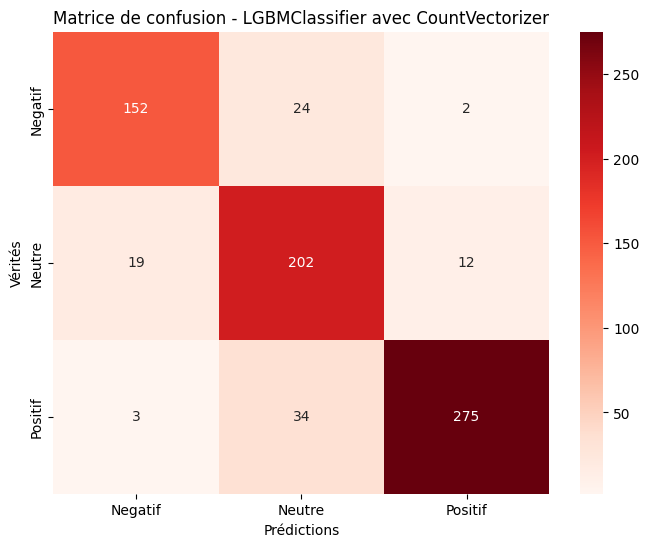

In [303]:
# Matrice de confusion pour LGBMClassifier avec CountVectorizer
conf_matrix_count_lgbm = confusion_matrix(y_test, y_pred_count_lgbm)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_count_lgbm, annot=True, fmt='d', cmap='Reds', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Matrice de confusion - LGBMClassifier avec CountVectorizer")
plt.xlabel("Prédictions")
plt.ylabel("Vérités")
plt.show()

#### <span style="color: #28A745;">**Courbe d’apprentissage**</span>

In [ ]:
# Tracer la courbe d'apprentissage pour LightGBM avec CountVectorizer
plot_learning_curve(lgbm_model_count, X_train_count.astype(np.float32), y_train, "Courbe d'apprentissage - LightGBM (CountVectorizer)")

### <span style="color: #28A745;">**5.2. LightGBM avec TF-IDF Vectorizer**</span>

In [304]:
# Entraînement et évaluation avec TF-IDF
lgbm_model_tfidf = LGBMClassifier(learning_rate=0.05, num_leaves=20, n_estimators=250, class_weight='balanced', max_depth=-1, min_child_samples=4)
lgbm_model_tfidf.fit(X_train_tfidf.astype(np.float32), y_train)

# Prédictions sur le jeu de test
y_pred_tfidf_lgbm = lgbm_model_tfidf.predict(X_test_tfidf.astype(np.float32))

# Prédictions sur le jeu de validation
y_val_pred_tfidf_lgbm = lgbm_model_tfidf.predict(X_val_tfidf.astype(np.float32))

# Rapport complet pour LGBMClassifier avec TF-IDF
print("Rapport pour LGBMClassifier avec TF-IDF:")
accuracy_tfidf_lgbm = accuracy_score(y_test, y_pred_tfidf_lgbm)
print(f"Accuracy pour LGBMClassifier avec TF-IDF: {accuracy_tfidf_lgbm*100:.2f}%")
accuracy_val_tfidf_lgbm = accuracy_score(y_val, y_val_pred_tfidf_lgbm)
print(f"Accuracy pour LGBMClassifier avec TF-IDF (validation): {accuracy_val_tfidf_lgbm*100:.2f}%")
print(classification_report(y_test, y_pred_tfidf_lgbm, target_names=label_encoder.classes_))

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.015808 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3243
[LightGBM] [Info] Number of data points in the train set: 2529, number of used features: 564
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Rapport pour LGBMClassifier avec TF-IDF:
Accuracy pour LGBMClassifier avec TF-IDF: 86.72%
Accuracy pour LGBMClassifier avec TF-IDF (validation): 86.46%
              precision    recall  f1-score   support

     Negatif       0.89      0.83      0.86       178
      Neutre       0.76      0.89      0.82       233
     Positif       0.95      0.88      0.91       312

    accuracy                           0.87       723
   macro avg       0.87      0.86      0.86       723
weighted avg       0.88      0.87      0.87       723



#### <span style="color: #28A745;">**Matrice de confusion**</span>

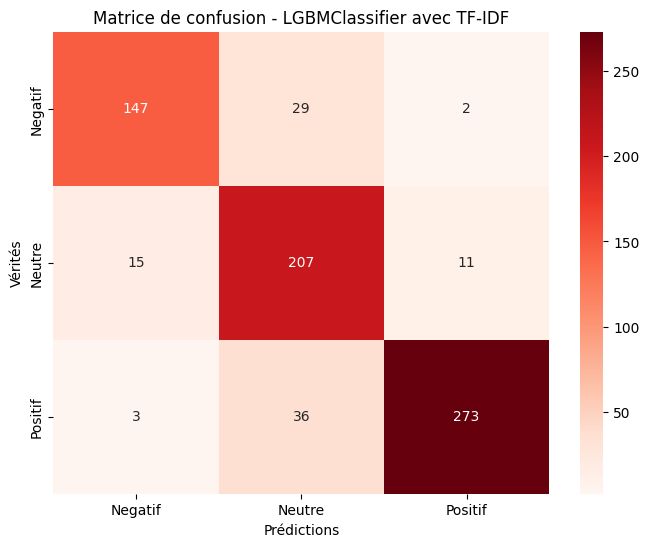

In [305]:
# Matrice de confusion pour LGBMClassifier avec TF-IDF
conf_matrix_tfidf_lgbm = confusion_matrix(y_test, y_pred_tfidf_lgbm)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_tfidf_lgbm, annot=True, fmt='d', cmap='Reds', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Matrice de confusion - LGBMClassifier avec TF-IDF")
plt.xlabel("Prédictions")
plt.ylabel("Vérités")
plt.show()

#### <span style="color: #28A745;">**Courbe d’apprentissage**</span>

In [ ]:
# Tracer la courbe d'apprentissage pour LightGBM avec TF-IDF
plot_learning_curve(lgbm_model_tfidf, X_train_tfidf.astype(np.float32), y_train, "Courbe d'apprentissage - LightGBM (TF-IDF)")

## <span style="color: #28A745;">**Résultats Comparatifs des Modèles de Classification**</span>

In [306]:
# Liste des modèles et leurs noms à afficher
models = [
    ("Régression Logistique", "count", "tfidf"),
    ("SVM", "count_svc", "tfidf_svc"),
    ("Arbre de Décision", "count_dt", "tfidf_dt"),
    ("Naive Bayes", "count_nb", "tfidf_nb"),
    ("LightGBM", "count_lgbm", "tfidf_lgbm")
]

# Fonction pour formater les précisions
def format_accuracies(base_name):
    train_acc = globals()[f"accuracy_{base_name}"]
    val_acc = globals()[f"accuracy_val_{base_name}"]
    return (f"{train_acc * 100:.2f}%", f"{val_acc * 100:.2f}%")

# Préparation des données pour le DataFrame
data = []
for model_name, count_name, tfidf_name in models:
    count_train, count_val = format_accuracies(count_name)
    tfidf_train, tfidf_val = format_accuracies(tfidf_name)

    data.extend([
        {
            "Modèle": model_name,
            "Vectorisation": "CountVectorizer",
            "Accuracy (Test)": count_train,
            "Accuracy (Validation)": count_val
        },
        {
            "Modèle": model_name,
            "Vectorisation": "TF-IDF",
            "Accuracy (Test)": tfidf_train,
            "Accuracy (Validation)": tfidf_val
        }
    ])

# Création du DataFrame
results_comparison = pd.DataFrame(data)

# Tri et réinitialisation de l'index
results_comparison = (results_comparison
                     .sort_values(by="Accuracy (Test)", ascending=False)
                     .reset_index(drop=True))

# Affichage du tableau comparatif
results_comparison

,Modèle,Vectorisation,Accuracy (Test),Accuracy (Validation)
0,Naive Bayes,CountVectorizer,88.24%,91.16%
1,Naive Bayes,TF-IDF,87.69%,90.61%
2,Régression Logistique,CountVectorizer,87.28%,89.78%
3,LightGBM,CountVectorizer,87.00%,87.02%
4,SVM,TF-IDF,86.86%,89.23%
5,LightGBM,TF-IDF,86.72%,86.46%
6,Régression Logistique,TF-IDF,86.58%,89.78%
7,SVM,CountVectorizer,85.89%,86.46%
8,Arbre de Décision,TF-IDF,83.13%,83.15%
9,Arbre de Décision,CountVectorizer,80.50%,83.43%


<h3 style="text-align: center; color: #E30613;"><b><i>Développé par: OUARAS Khelil Rafik</i></b></h3>